# Import the Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import tqdm

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [2]:
(X_train,y_train) , (X_test,y_test) = mnist.load_data()

In [3]:
print(f'Train shape : {X_train.shape}')
print(f'Train label shape : {y_train.shape}')

print(f'Test shape : {X_test.shape}')
print(f'Test label shape : {y_test.shape}')

Train shape : (60000, 28, 28)
Train label shape : (60000,)
Test shape : (10000, 28, 28)
Test label shape : (10000,)


# Lets see some examples

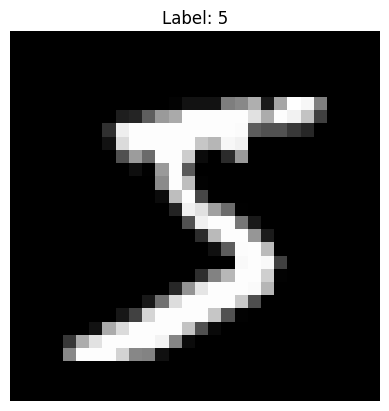

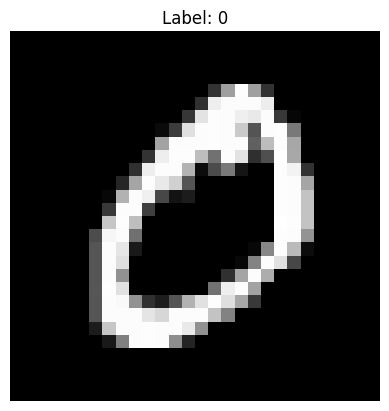

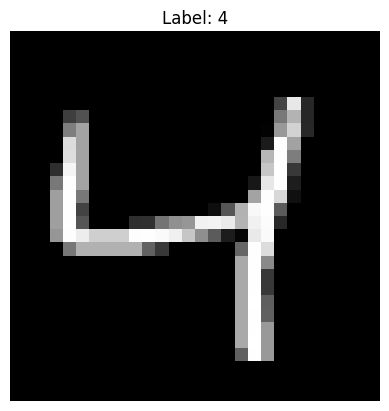

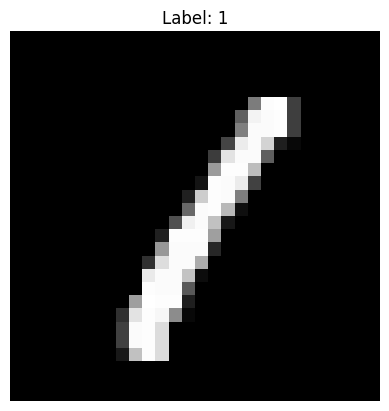

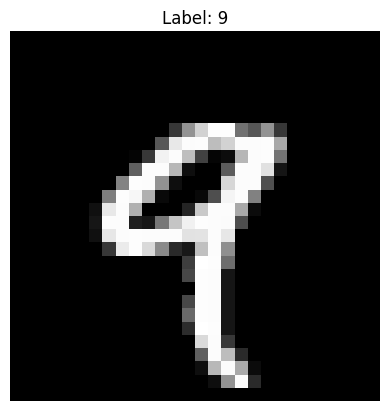

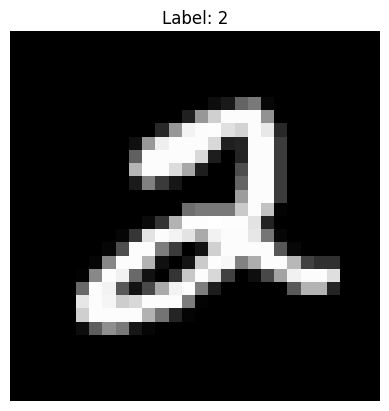

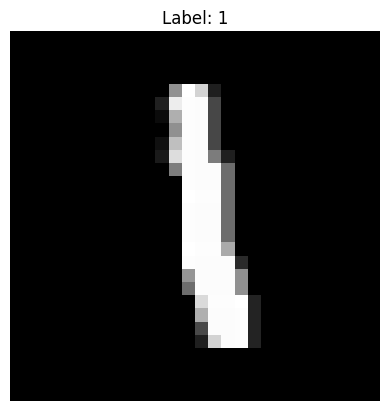

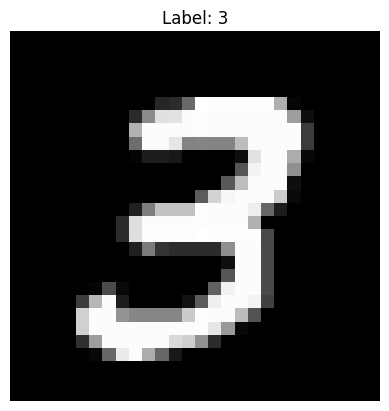

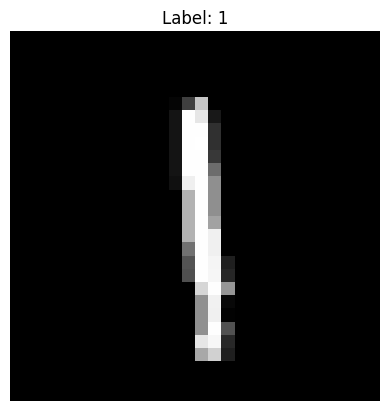

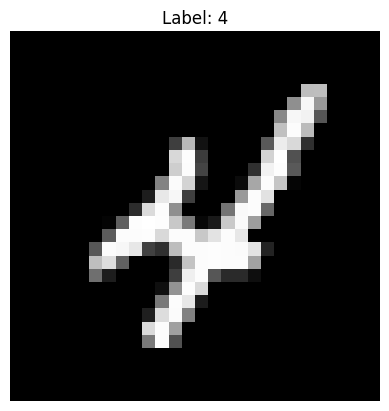

In [4]:
# print(y_train[:10])

for i in range(10):
    plt.imshow(X_train[i] , cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
    plt.show()

# Normalize the Dataset

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
X_train[1] / 255

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
total_classes = len(set(y_train))
total_classes

10

## Modelling

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
pd.Series(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

### 1. ANN Model

In [12]:
from tensorflow.keras.layers import Dense, InputLayer , Rescaling , Dropout , Flatten
from tensorflow.keras import Sequential

ann_model = Sequential([
    InputLayer(input_shape=(28,28)),
    # Rescaling(1./255),
    
    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dropout(0.1),
    
    Dense(total_classes, activation= 'softmax')
])

ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0

In [13]:
ann_model.compile(loss = 'sparse_categorical_crossentropy' , optimizer= "adam" , metrics = ['accuracy']) 
# If we do one hot encoding, loss should be categorical_crossentropy. But we do integer encoding so we use sparse_categorical_crossentropy.

ann_model.fit(X_train, y_train, batch_size=32 , epochs = 10 , validation_split= 0.1)

Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4103 - accuracy: 0.8774 - val_loss: 0.1188 - val_accuracy: 0.9630
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1967 - accuracy: 0.9441 - val_loss: 0.0943 - val_accuracy: 0.9718
Epoch 3/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1496 - accuracy: 0.9569 - val_loss: 0.0856 - val_accuracy: 0.9733
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1289 - accuracy: 0.9627 - val_loss: 0.0770 - val_accuracy: 0.9773
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1134 - accuracy: 0.9668 - val_loss: 0.0734 - val_accuracy: 0.9785
Epoch 6/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1028 - accuracy: 0.9701 - val_loss: 0.0762 - val_accuracy: 0.9757
Epoch 7/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0931 - accuracy: 0.9725 - val_loss: 0.0707 - val_accuracy:

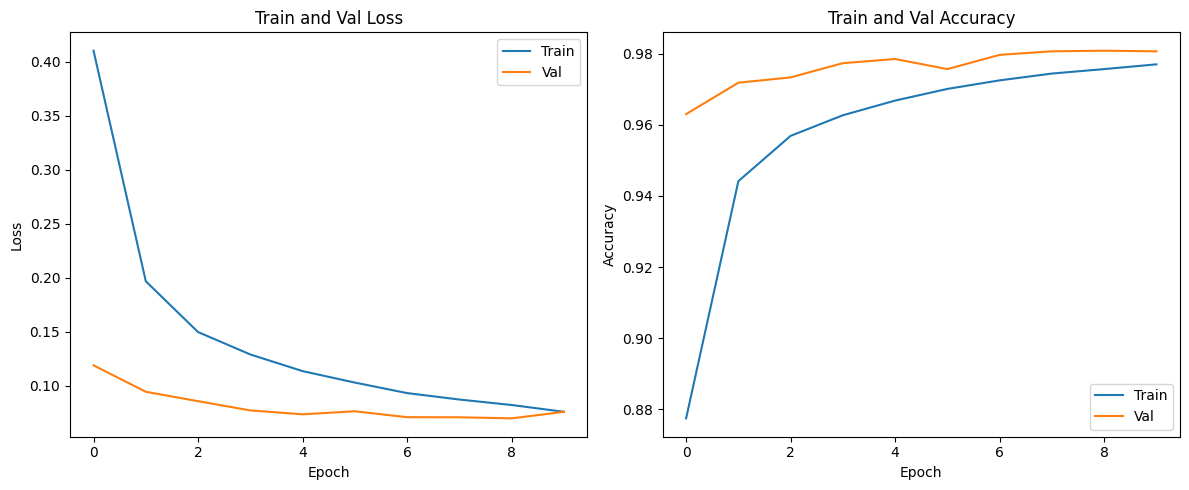

In [14]:
def visualize_model(model):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.plot(model.history.history['loss'])
    ax1.plot(model.history.history['val_loss'])
    ax1.set_title('Train and Val Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend(['Train', 'Val'], loc='upper right')

    ax2.plot(model.history.history['accuracy'])
    ax2.plot(model.history.history['val_accuracy'])
    ax2.set_title('Train and Val Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend(['Train', 'Val'], loc='lower right')


    plt.tight_layout()
    plt.show()
        
visualize_model(ann_model)

In [15]:
ann_model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0788 - accuracy: 0.9777


[0.07876764237880707, 0.9776999950408936]

### 2. Basic CNN

In [16]:
from tensorflow.keras.layers import Conv2D , MaxPooling2D , GlobalMaxPooling2D
from keras.models import Sequential

basic_cnn = Sequential([
    Conv2D(64 , (3,3) , padding = 'same' , activation = 'relu' , input_shape = (28,28,1) ),
    MaxPooling2D(2,2),
    Conv2D(64 , (3,3) , padding = 'same' ,  activation = 'relu'),
    MaxPooling2D(2,2),
    GlobalMaxPooling2D(),
    
    Dense(64 , activation = 'relu'),
    Dense(total_classes , activation = 'softmax')    
])

basic_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 global_max_pooling2d (Globa  (None, 64)               0         
 lMaxPooling2D)                                                  
                                                      

In [17]:
basic_cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# basic_cnn.fit(X_train.reshape(-1,28,28,1) , y_train , epochs = 20 , batch_size= 32 , validation_split= 0.1 )
X_train = np.expand_dims(X_train, axis=-1)  # Add channel dimension to X_train
X_test = np.expand_dims(X_test, axis=-1)  # Add channel dimension to X_test

basic_cnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 5s 2ms/step - loss: 0.4085 - accuracy: 0.8727 - val_loss: 0.1152 - val_accuracy: 0.9652
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.1230 - accuracy: 0.9615 - val_loss: 0.0872 - val_accuracy: 0.9740
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0911 - accuracy: 0.9716 - val_loss: 0.0820 - val_accuracy: 0.9765
Epoch 4/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0772 - accuracy: 0.9756 - val_loss: 0.0749 - val_accuracy: 0.9770
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0672 - accuracy: 0.9784 - val_loss: 0.0627 - val_accuracy: 0.9820
Epoch 6/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0590 - accuracy: 0.9815 - val_loss: 0.0589 - val_accuracy: 0.9828
Epoch 7/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0527 - accuracy: 0.9837 - val_loss: 0.0632 - val_accuracy:

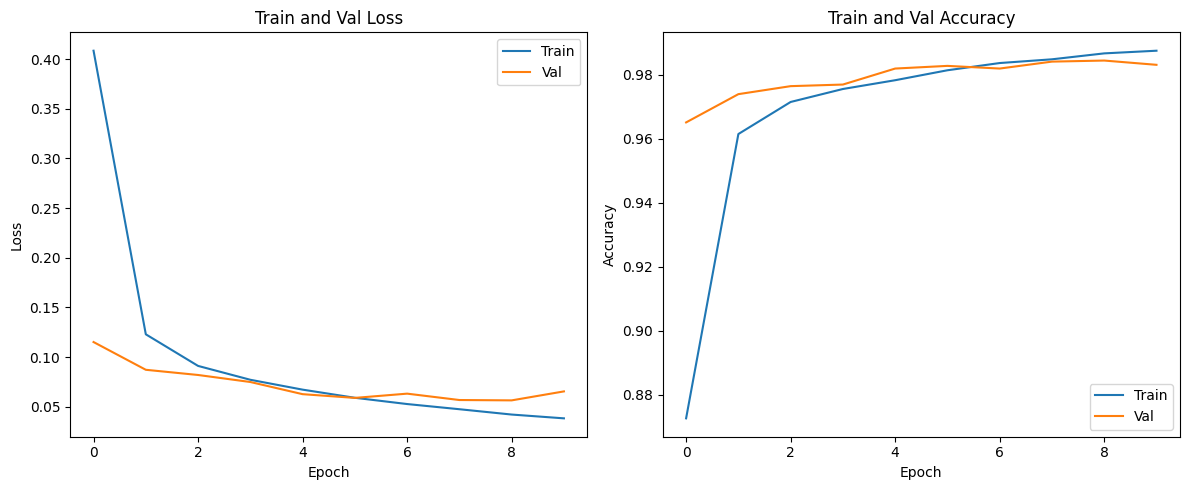

In [18]:
visualize_model(basic_cnn)

In [19]:
basic_cnn.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0653 - accuracy: 0.9810


[0.06528700888156891, 0.9810000061988831]

In [ ]:
# I'll continue later.

### 3.Skip Connection CNN

In [ ]:
from keras.layers import AveragePooling2D , Concatenate , Conv2D , GlobalAveragePooling2D

def conv_bn(inputs,
            filters = 16,
            kernel_size = (3,3)):
  
  x = Conv2D(filters, kernel_size, padding= 'same')(inputs)
  x = tf.keras.layers.BatchNormalization()(x) # This can be after than optimizer. But this is also possible.
  x = tf.nn.silu(x) # swish. # mish,... # Bigger then relu but also their costs are more than relu too :)

  return x


def skip_connection(inputs,
                    filters = 16,
                    kernel_size = (3,3)):
  
  x = conv_bn(inputs, filters, kernel_size)
  x = conv_bn(x, filters, kernel_size)

  x = Concatenate()([x, inputs]) # This is the main part for skip_connection.

  return x


def downsampling_conv(inputs,
                      filters = 16,
                      kernel_size = (3,3)):
  
  x = conv_bn(inputs, filters, kernel_size)
  x = conv_bn(x, filters, kernel_size)

  x = AveragePooling2D((3,3))(x)

  return x

In [ ]:
input_layer = tf.keras.Input((28, 28, 1)) # We use function api so we cant give inputs as a normal list or tuple. We should use tf.keras.Input()
rescaled_inputs = tf.keras.layers.Rescaling(1/255.0)(input_layer)

x = skip_connection(rescaled_inputs, filters = 8)
# x = skip_connection(x, filters = 16)
x = downsampling_conv(x, filters = 16)

x = skip_connection(x, filters = 32)
# x = skip_connection(x, filters = 32)
x = downsampling_conv(x, filters = 64)

x = GlobalAveragePooling2D()(x)
x = Dense(total_classes, activation = 'softmax')(x)

res_cnn = tf.keras.Model(input_layer, x)
res_cnn.summary()

In [ ]:
X_train.shape

In [ ]:
# reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
#     monitor = 'val_loss',
#     factor = 0.1,
#     patience = 3 , 
#     mode = 'min' ,
#     verbose = 1 , 
#     min_lr = 1e-6
# )

# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor = 'val_loss',
#     patience = 7 , 
#     mode = 'min' ,
#     verbose = 1 , 
#     restore_best_weights=True
# )

# callbacks = [reduce_lr,early_stopping]

res_cnn.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False), # If output activation = None, then we should use this for call tf.nn.sparse_softmax_cross_entropy_with_logits function.
                  optimizer = 'adam',
                  metrics = ['acc']
                  )

res_cnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

In [ ]:
visualize_model(res_cnn)

In [ ]:
res_cnn.evaluate(X_test, y_test)

# VGG16 PreTrained Model

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16 , preprocess_input

In [ ]:
# input_layer = tf.keras.Input((28, 28, 1))

# preprocessed_inputs = tf.keras.layers.Lambda(lambda x : preprocess_input(x))(input_layer)

In [ ]:
# Load pre-trained VGG16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(28,28,1))

In [ ]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False